In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import sklearn.tree       
import sklearn.metrics 
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
import glob
from sklearn.model_selection import train_test_split
import os.path
import time
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [3]:
def DecisionTree (X_train, y_train, X_test,y_test):
    start = time.time()
    
    d_tree=sklearn.tree.DecisionTreeClassifier(random_state=0)
    
    Max_features = ['auto', 'sqrt', 'log2']
    Max_depths = np.arange(1,34,2)
    Min_samples_splits = np.linspace(0.001, 0.5, 10, endpoint=True)
    Min_samples_leafs = np.linspace(0.0001, 0.05, 10, endpoint=True)
    param_grid = {'max_features': Max_features, 'max_depth': Max_depths,  'min_samples_split': Min_samples_splits, 'min_samples_leaf': Min_samples_leafs}

    gsdt = sklearn.model_selection.GridSearchCV(d_tree, param_grid, verbose=0,cv=3).fit(X_train, y_train)
    
    y_pred_train_dt = gsdt.best_estimator_.predict(X_train)
    y_pred_test_dt = gsdt.best_estimator_.predict(X_test)

    test_acc_score_dt=sklearn.metrics.accuracy_score(y_test, y_pred_test_dt)*100
    train_acc_score_dt=sklearn.metrics.accuracy_score(y_train, y_pred_train_dt)*100
    
    if np.unique(y_train).size>2:
        lb = sklearn.preprocessing.LabelBinarizer()
        yy_test=lb.fit_transform(y_test)
        zz_test=lb.transform(y_pred_test_dt)
        roc_auc_dt=sklearn.metrics.roc_auc_score(yy_test, zz_test, multi_class="ovr", average="weighted")*100
#         print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
    else:
        roc_auc_dt=sklearn.metrics.roc_auc_score(y_test, gsdt.best_estimator_.predict_proba(X_test)[:, 1])*100
#         print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
        sklearn.metrics.plot_roc_curve(gsdt.best_estimator_, X_test, y_test, name='Decision tree')
    

    
#     roc_auc_dt=sklearn.metrics.roc_auc_score(y_test, gsdt.best_estimator_.predict_proba(X_test)[:, 1])*100
    t = time.time()-start
    return test_acc_score_dt, train_acc_score_dt, gsdt.best_estimator_, roc_auc_dt, t

In [25]:
def NeuralNetwork (X_train, y_train, X_test, y_test):
    start = time.time()
    n_net = sklearn.neural_network.MLPClassifier(random_state=0, max_iter=1500)
    
    batch_size = [40, 60, 80,100]
    #epochs = [10, 50]
    #learn_rate = [0.001, 0.01, 0.1]
    momentum = [0.0001,0.002,0.01,0.05]
    #neurons = [1, 5, 10, 15, 20, 25, 30] 
    activation = ['identity', 'logistic', 'tanh', 'relu']
#     alpha = [0.0001,0.002]
#     solver=['lbfgs', 'sgd', 'adam']
    param_grid = {'batch_size':batch_size,  'momentum':momentum, 
              'activation' : activation }

    gsnl = sklearn.model_selection.GridSearchCV(n_net, param_grid, verbose=0,cv=3).fit(X_train, y_train)

    y_pred_train_nl = gsnl.best_estimator_.predict(X_train)
    y_pred_test_nl = gsnl.best_estimator_.predict(X_test)

    test_acc_score_nl=sklearn.metrics.accuracy_score(y_test, y_pred_test_nl)*100
    train_acc_score_nl=sklearn.metrics.accuracy_score(y_train, y_pred_train_nl)*100
    
    if np.unique(y_train).size>2:
        lb = sklearn.preprocessing.LabelBinarizer()
        yy_test=lb.fit_transform(y_test)
        zz_test=lb.transform(y_pred_test_nl)
        roc_auc_nl=sklearn.metrics.roc_auc_score(yy_test, zz_test, multi_class="ovr", average="weighted")*100
#         print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
    else:
        roc_auc_nl=sklearn.metrics.roc_auc_score(y_test, gsnl.best_estimator_.predict_proba(X_test)[:, 1])*100
#         print ("ROC AUC score:           "+"{:.4f}".format(roc)+"%")
        sklearn.metrics.plot_roc_curve(gsnl.best_estimator_, X_test, y_test, name='Neural Network')
    

#     sklearn.metrics.plot_roc_curve( gsnl.best_estimator_, X_test, y_test, name='Neural network')
#     roc_auc_nl=sklearn.metrics.roc_auc_score(y_test, gsnl.best_estimator_.predict_proba(X_test)[:, 1])*100
    t = time.time()-start
    return test_acc_score_nl, train_acc_score_nl, gsnl.best_estimator_, roc_auc_nl, t

In [5]:
current_directory = os.path.dirname(os.getcwd())
project_directory = os.path.split(current_directory)[0]
dataset_directory = os.path.join(project_directory, 'datasets')
print(dataset_directory)

occupancy_dataset_directory = os.path.join(dataset_directory, '1_occupancy')
healthy_older_people_dataset_directory = os.path.join(dataset_directory, '2_healthy_older_people')
bitcoin_heist_ransonware_address_dataset_directory = os.path.join(dataset_directory, '3_bitcoin_heist_ransonware_address')
bank_additional_dataset_directory = os.path.join(dataset_directory, '4_bank_additional')
montreal_crime_dataset_directory = os.path.join(dataset_directory, '5_interventionscitoyendo')
credit_cards_dataset_directory = os.path.join(dataset_directory, '6_credit_cards')
census_income_dataset_directory = os.path.join(dataset_directory, '7_census_income')
yeast_dataset_directory = os.path.join(dataset_directory, '8_yeast')
magic_gamma_dataset_directory = os.path.join(dataset_directory, '9_magic_gamma')

# print(os.listdir(dataset_directory))
print(occupancy_dataset_directory
      , healthy_older_people_dataset_directory
      , bitcoin_heist_ransonware_address_dataset_directory
      , bank_additional_dataset_directory
      , magic_gamma_dataset_directory
      ,credit_cards_dataset_directory)

C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets
C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\1_occupancy C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\2_healthy_older_people C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\3_bitcoin_heist_ransonware_address C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\4_bank_additional C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\9_magic_gamma C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\6_credit_cards


   # 1. Occupancy data

In [104]:
training_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatraining.txt')
test_dataset_url = os.path.join(occupancy_dataset_directory, 'occupancy_data', 'datatest.txt')

data_occupancy = np.loadtxt(training_dataset_url,delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
data_occupany_test=np.loadtxt(test_dataset_url, delimiter=',', skiprows=1, usecols = (2,3,4,5,6,7))
X_train=data_occupancy[:, 0:5]
y_train=data_occupancy[:, 5].astype(np.int32)
X_test=data_occupany_test[:, 0:5]
y_test=data_occupany_test[:, 5].astype(np.int32)
print(y_train.shape, y_test.shape)
print(y_test)

(8143,) (2665,)
[1 1 1 ... 1 1 1]


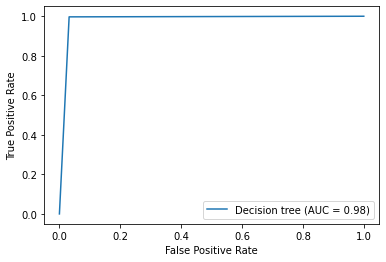

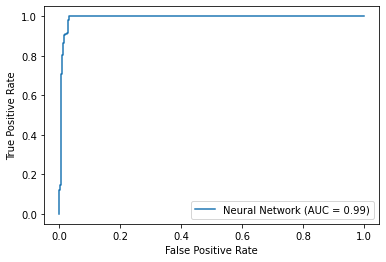

In [105]:
test_score_dt1, train_score_dt1, dtree1, roc_auc_dt1, t_dt1 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl1, train_score_nl1, nnetwork1, roc_auc_nl1, t_nl1 = NeuralNetwork(X_train, y_train, X_test, y_test)

# print ("Training accuracy score: "+"{:.4f}".format(ac_train)+"%")
# print ("Test accuracy score:     "+"{:.4f}".format(ac_test)+"%")

In [106]:
print('Best Decision classifier from grid search:')
print(dtree1 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork1)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt1 ],
                                    'Neural Network':[t_nl1]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt1, train_score_dt1 ,roc_auc_dt1],
                                        'Neural Network':[test_score_nl1, train_score_nl1, roc_auc_nl1]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)
# print ("Elapsed time for Decision Tree: "+"{:.4f}".format(t_dt_occ)+" sec")
# print ("Elapsed time for Neural Network: "+"{:.4f}".format(t_nl_occ)+" sec")


Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=1, max_features='auto',
                       min_samples_leaf=0.0001, min_samples_split=0.001,
                       random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='identity', batch_size=60, momentum=0.0001,
              random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        63.126831      407.883028    Decision Tree


                Decision Tree  Neural Network      Best Score
Test Accuracy       97.861163       97.861163   Decision Tree
Train Accuracy      98.784232       98.084244   Decision Tree
ROC AUC             98.250877       99.179385  Neural Network


# 2. Bank marketting

In [107]:
training_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional-full.csv')
test_dataset_url = os.path.join(bank_additional_dataset_directory, 'bank-additional', 'bank-additional', 'bank-additional.csv')
print(training_dataset_url, test_dataset_url)


# Loading code
job_mapping = {'admin.':1, 'blue-collar':2, 'entrepreneur':3
               , 'housemaid':4, 'management':5, 'retired':6
               , 'self-employed':7, 'services':8, 'student':9
               , 'technician':10, 'unemployed':11, 'unknown':0}
boolean_mapping ={'no': 0, 'yes': 1}
marital_mapping ={'divorced':1, 'married':2, 'single':3}
education_mapping={'basic.4y':1, 'basic.6y':2, 'basic.9y':3
                   , 'high.school':4, 'illiterate':5, 'professional.course':6
                   , 'university.degree':7}
contact_mapping={'cellular':1, 'telephone':2}
month_mapping={'may':5, 'jun':6, 'nov':11
               , 'sep':9, 'jul':7, 'aug':8
               , 'mar':3, 'oct':10, 'apr':4
               , 'dec':12}
day_mapping={'fri':5, 'wed':3, 'mon':1, 'thu':4, 'tue':2}
poutcome_mapping={'nonexistent':1, 'failure':2, 'success':3}

R=pd.read_csv(training_dataset_url, delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X1=R[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y1=R[:, 20].astype(np.int32)
T=pd.read_csv(test_dataset_url, delimiter=';').replace(boolean_mapping).replace(job_mapping).replace(marital_mapping).replace(education_mapping).replace(contact_mapping).replace(month_mapping).replace(day_mapping).replace(poutcome_mapping).values
X2=T[:, [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19]]
y2=T[:, 20].astype(np.int32)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

print(X.shape)
X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)
# print(y_test)

C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\4_bank_additional\bank-additional\bank-additional\bank-additional-full.csv C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\4_bank_additional\bank-additional\bank-additional\bank-additional.csv
(45307, 19)


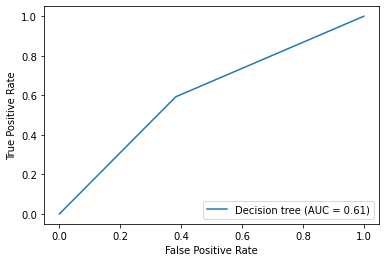

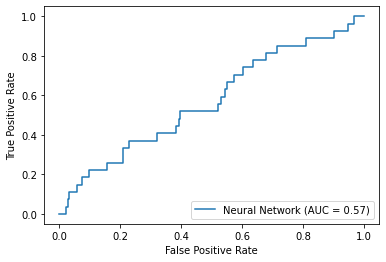

In [108]:
test_score_dt2, train_score_dt2, dtree2, roc_auc_dt2, t_dt2 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl2, train_score_nl2, nnetwork2, roc_auc_nl2, t_nl2 = NeuralNetwork(X_train, y_train, X_test, y_test)
# print ("Elapsed time:            "+"{:.4f}".format(t)+" sec")
# print ("Training accuracy score: "+"{:.4f}".format(ac_train)+"%")
# print ("Test accuracy score:     "+"{:.4f}".format(ac_test)+"%")

In [109]:
print('Best Decision classifier from grid search:')
print(dtree2 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork2)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt2 ],
                                    'Neural Network':[t_nl2]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt2, train_score_dt2, roc_auc_dt2],
                                        'Neural Network':[test_score_nl2, train_score_nl2, roc_auc_nl2]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=1, max_features='auto',
                       min_samples_leaf=0.0001, min_samples_split=0.001,
                       random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='identity', batch_size=40, momentum=0.0001,
              random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        52.394401      105.835508    Decision Tree


                Decision Tree  Neural Network     Best Score
Test Accuracy       97.300000       97.300000  Decision Tree
Train Accuracy      97.050000       97.050000  Decision Tree
ROC AUC             60.513494       57.047695  Decision Tree


# 3. ACTIVITY RECOGNITION IN HEALTHY OLD PEOPLE

In [116]:
files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S1_Dataset", "d*"))
Rs = [pd.read_csv(f, header=None) for f in files]
R=pd.concat(Rs,ignore_index=True).values
X1=R[:, 1:8]
y1=R[:, 8].astype(np.int32)

files = glob.glob(os.path.join(healthy_older_people_dataset_directory, 'Datasets_Healthy_Older_People', 'datasets', "S2_Dataset", "d*"))
Ts = [pd.read_csv(f, header=None) for f in files]
T=pd.concat(Ts,ignore_index=True).values
X2=T[:, 1:8]
y2=T[:, 8].astype(np.int32)

X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2))

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
# print(y_test)

(4000, 7) (1000, 7)
(4000,) (1000,)


In [117]:
test_score_dt3, train_score_dt3, dtree3, roc_auc_dt3, t_dt3 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl3, train_score_nl3, nnetwork3, roc_auc_nl3, t_nl3 = NeuralNetwork(X_train, y_train, X_test, y_test)
# print ("Elapsed time:            "+"{:.4f}".format(t)+" sec")
# print ("Training accuracy score: "+"{:.4f}".format(ac_train)+"%")
# print ("Test accuracy score:     "+"{:.4f}".format(ac_test)+"%")

In [118]:
print('Best Decision classifier from grid search:')
print(dtree3 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork3)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt3 ],
                                    'Neural Network':[t_nl3]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt3, train_score_dt3, roc_auc_dt3],
                                        'Neural Network':[test_score_nl3, train_score_nl3, roc_auc_nl3]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=11, max_features='auto',
                       min_samples_leaf=0.0001, min_samples_split=0.001,
                       random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='logistic', batch_size=40, max_iter=500,
              momentum=0.0001, random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        44.666682      807.334329    Decision Tree


                Decision Tree  Neural Network      Best Score
Test Accuracy       94.300000       95.000000  Neural Network
Train Accuracy      98.225000       96.075000   Decision Tree
ROC AUC             96.387906       96.736298  Neural Network


  # 4. Bitcoin Ransonware Dataset

In [120]:
training_dataset_url = os.path.join(bitcoin_heist_ransonware_address_dataset_directory, 'data', 'BitcoinHeistData.csv')
print(training_dataset_url)


# Loading code
nrows=1000000
nparts=10
ntest=nrows//nparts
label_mapping = {'princetonCerber':1, 'princetonLocky':1, 'montrealCryptoLocker':1,
 'montrealCryptXXX':1, 'paduaCryptoWall':1, 'montrealWannaCry':1,
 'montrealDMALockerv3':1, 'montrealCryptoTorLocker2015':1, 'montrealSamSam':1,
 'montrealFlyper':1, 'montrealNoobCrypt':1, 'montrealDMALocker':1, 'montrealGlobe':1,
 'montrealEDA2':1, 'paduaKeRanger':1, 'montrealVenusLocker':1, 'montrealXTPLocker':1,
 'paduaJigsaw':1, 'montrealGlobev3':1, 'montrealJigSaw':1, 'montrealXLockerv5.0':1,
 'montrealXLocker':1, 'montrealRazy':1, 'montrealCryptConsole':1,
 'montrealGlobeImposter':1, 'montrealSam':1, 'montrealComradeCircle':1,
 'montrealAPT':1, 'white':0}

R=pd.read_csv(training_dataset_url, nrows=nrows, usecols=["year","day","length","weight","count","looped","neighbors","income","label"]).replace(label_mapping).values
np.random.seed(0)
np.random.shuffle(R)
X=R[:, 0:8]
y=R[:, 8].astype(np.int32)

X = X[:5000]
y = y[:5000]


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

C:\Users\Manish\Dropbox\COMP 6321\project\COMP-6321-ML-master\datasets\3_bitcoin_heist_ransonware_address\data\BitcoinHeistData.csv
(4000, 8) (1000, 8)


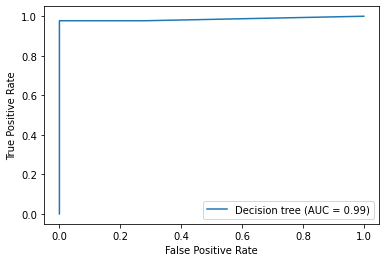

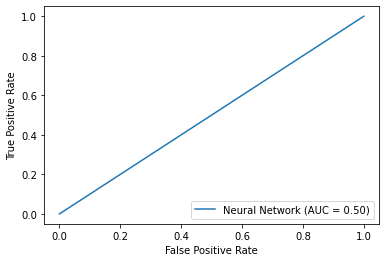

In [121]:
test_score_dt4, train_score_dt4, dtree4, roc_auc_dt4, t_dt4 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl4, train_score_nl4, nnetwork4, roc_auc_nl4, t_nl4 = NeuralNetwork(X_train, y_train, X_test, y_test)

In [122]:
print('Best Decision classifier from grid search:')
print(dtree4 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork4)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt4 ],
                                    'Neural Network':[t_nl4]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt4, train_score_dt4, roc_auc_dt4],
                                        'Neural Network':[test_score_nl4, train_score_nl4, roc_auc_nl4]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=5, max_features='log2',
                       min_samples_leaf=0.0001,
                       min_samples_split=0.11188888888888888, random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='identity', batch_size=40, max_iter=500,
              momentum=0.0001, random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        55.258263       95.909682    Decision Tree


                Decision Tree  Neural Network     Best Score
Test Accuracy       99.900000           95.60  Decision Tree
Train Accuracy      99.875000           95.85  Decision Tree
ROC AUC             98.543886           50.00  Decision Tree


# 5. Montreal Crime Dataset

In [6]:
training_dataset_url = os.path.join(montreal_crime_dataset_directory, 'interventionscitoyendo.csv')


category_mapping = {'Introduction':1, 'Vol dans / sur véhicule à moteur':2, 'Vol de véhicule à moteur':3, 'Méfait':4, 'Vol qualifié':5, 'Infraction entraînant la mort':6, 'Vols qualifiés':5, 'Infractions entrainant la mort':6}
shift_mapping ={'jour':1, 'soir':2, 'nuit':3}
TR=pd.read_csv(training_dataset_url, encoding='latin1').replace(category_mapping).replace(shift_mapping)
TR['YEAR']=TR.DATE.str.split('-').str[0].astype(np.int32)
TR['MONTH']=TR.DATE.str.split('-').str[1].astype(np.int32)
TR['DAY']=TR.DATE.str.split('-').str[2].astype(np.int32)
TR.dropna(inplace=True)

R=TR.values
X = R[:, [2,3,4,5,6,7,9,10]]
y = R[:, 0].astype(np.int32)

X = X[:5000]
y = y[:5000]


X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(4000, 8) (1000, 8)


In [7]:
test_score_dt5, train_score_dt5, dtree5, roc_auc_dt5, t_dt5 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl5, train_score_nl5, nnetwork5, roc_auc_nl5, t_nl5 = NeuralNetwork(X_train, y_train, X_test, y_test)

In [8]:
print('Best Decision classifier from grid search:')
print(dtree5 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork5)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt5 ],
                                    'Neural Network':[t_nl5]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt5, train_score_dt5, roc_auc_dt5],
                                        'Neural Network':[test_score_nl5, train_score_nl5, roc_auc_nl5]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=9, max_features='auto',
                       min_samples_leaf=0.0001, min_samples_split=0.001,
                       random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='logistic', batch_size=40, max_iter=500,
              momentum=0.0001, random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        79.023314       160.38432    Decision Tree


                Decision Tree  Neural Network     Best Score
Test Accuracy       34.900000       32.800000  Decision Tree
Train Accuracy      51.550000       32.675000  Decision Tree
ROC AUC             55.430915       50.253645  Decision Tree


# 6. Credit Cards Dataset

In [9]:
dataset_url = os.path.join(credit_cards_dataset_directory, 'default_of_credit_card_clients.csv')

TR=pd.read_csv(dataset_url, skiprows=1, usecols=[i for i in range(1,25)])
print(TR.shape)

R=TR.values
X = R[:, :23]
y = R[:, 23].astype(np.int32)
print(X[0])

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)
print(X[0])
print(X_train[0])

(30000, 24)
[20000     2     2     1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0]
(4000, 23) (1000, 23)
[20000     2     2     1    24     2     2    -1    -1    -2    -2  3913
  3102   689     0     0     0     0   689     0     0     0     0]
[200000      2      1      1     45     -2     -2     -2     -2     -2
     -2   1417  12643   3977      0   2500    199  12660   3977      0
   2500    199   2944]


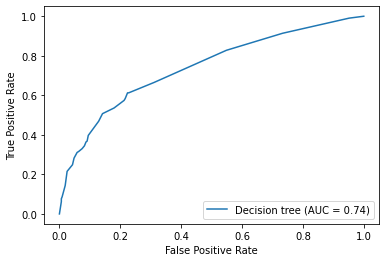

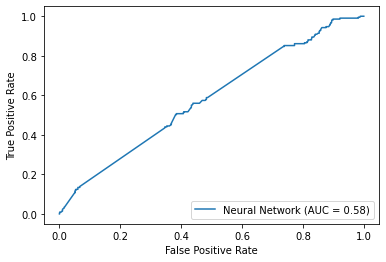

In [10]:
test_score_dt6, train_score_dt6, dtree6, roc_auc_dt6, t_dt6 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl6, train_score_nl6, nnetwork6, roc_auc_nl6, t_nl6 = NeuralNetwork(X_train, y_train, X_test, y_test)

In [11]:
print('Best Decision classifier from grid search:')
print(dtree6 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork6)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt6 ],
                                    'Neural Network':[t_nl6]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt6, train_score_dt6, roc_auc_dt6],
                                        'Neural Network':[test_score_nl6, train_score_nl6, roc_auc_nl6]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=5, max_features='auto',
                       min_samples_leaf=0.005644444444444445,
                       min_samples_split=0.001, random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='logistic', batch_size=40, max_iter=500,
              momentum=0.0001, random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time         76.47988      232.288279    Decision Tree


                Decision Tree  Neural Network     Best Score
Test Accuracy       80.100000       79.100000  Decision Tree
Train Accuracy      80.875000       77.575000  Decision Tree
ROC AUC             73.911347       58.233476  Decision Tree


# 7. Census Income Dataset

In [18]:
dataset_url = os.path.join(census_income_dataset_directory, 'adult_data.csv')

TR=pd.read_csv('../../datasets/7_census_income/adult_data.csv', encoding='utf8', header=None)
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

workclass_mapping = {'Private':1, 'Self-emp-not-inc':2
                    , 'Self-emp-inc':3, 'Federal-gov':4
                    , 'Local-gov':5, 'State-gov':6
                    , 'Without-pay':7, 'Never-worked':8}
TR = TR.replace(workclass_mapping)


education_mapping = {'Bachelors':1, 'Some-college':2, '11th':3
                     , 'HS-grad':4, 'Prof-school':5, 'Assoc-acdm':6
                     , 'Assoc-voc':7, '9th':8, '7th-8th':9
                     , '12th':10, 'Masters':11, '1st-4th':12
                     , '10th':13, 'Doctorate':14, '5th-6th':15
                     , 'Preschool':16}
TR = TR.replace(education_mapping)

marital_status_mapping = {'Married-civ-spouse':1, 'Divorced':2, 'Never-married':3
                          , 'Separated':4, 'Widowed':5, 'Married-spouse-absent':6
                          , 'Married-AF-spouse':7}
TR = TR.replace(marital_status_mapping)

occupation_mapping = {'Tech-support':1, 'Craft-repair':2, 'Other-service':3
                      , 'Sales':4, 'Exec-managerial':5, 'Prof-specialty':6
                      , 'Handlers-cleaners':7, 'Machine-op-inspct':8, 'Adm-clerical':9
                      , 'Farming-fishing':10, 'Transport-moving':11, 'Priv-house-serv':12
                      , 'Protective-serv':13, 'Armed-Forces':14}
TR = TR.replace(occupation_mapping)

relationship_mapping = {'Wife':1, 'Own-child':2, 'Husband':3
                , 'Not-in-family':4, 'Other-relative':5, 'Unmarried':6}
TR = TR.replace(relationship_mapping)

race_mapping = {'White':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3
                , 'Other':4, 'Black':5}
TR = TR.replace(race_mapping)

sex_mapping = {'Female':1, 'Male':2}
TR = TR.replace(sex_mapping)

country_mapping = {'United-States':1, 'Cambodia':2, 'England':3
                   , 'Puerto-Rico':4, 'Canada':5, 'Germany':6
                   , 'Outlying-US(Guam-USVI-etc)':7, 'India':8
                   , 'Japan':9, 'Greece':10, 'South':11
                   , 'China':12, 'Cuba':13, 'Iran':14
                   , 'Honduras':15, 'Philippines':16, 'Italy':17
                   , 'Poland':18, 'Jamaica':19, 'Vietnam':20
                   , 'Mexico':21, 'Portugal':22, 'Ireland':23
                   , 'France':24, 'Dominican-Republic':25, 'Laos':26
                   , 'Ecuador':27, 'Taiwan':28, 'Haiti':29
                   , 'Columbia':30, 'Hungary':31, 'Guatemala':32
                   , 'Nicaragua':33, 'Scotland':34, 'Thailand':35
                   , 'Yugoslavia':36, 'El-Salvador':37, 'Trinadad&Tobago':38
                   , 'Peru':39, 'Hong':40, 'Holand-Netherlands':41}
TR = TR.replace(country_mapping)

salary_mapping = {'<=50K':0, '>50K':1}
TR = TR.replace(salary_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

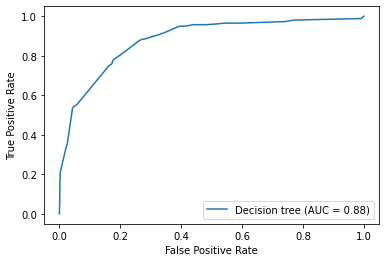

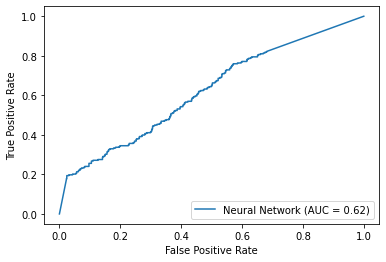

In [19]:
test_score_dt7, train_score_dt7, dtree7, roc_auc_dt7, t_dt7 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl7, train_score_nl7, nnetwork7, roc_auc_nl7, t_nl7 = NeuralNetwork(X_train, y_train, X_test, y_test)

In [20]:
print('Best Decision classifier from grid search:')
print(dtree7)
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork7)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt7 ],
                                    'Neural Network':[t_nl7]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt7, train_score_dt7, roc_auc_dt7],
                                        'Neural Network':[test_score_nl7, train_score_nl7, roc_auc_nl7]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=9, max_features='auto',
                       min_samples_leaf=0.0001,
                       min_samples_split=0.05644444444444444, random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(activation='identity', batch_size=80, max_iter=500,
              momentum=0.0001, random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        39.165178      200.572786    Decision Tree


                Decision Tree  Neural Network     Best Score
Test Accuracy       84.600000       77.100000  Decision Tree
Train Accuracy      84.800000       78.125000  Decision Tree
ROC AUC             88.138333       62.112925  Decision Tree


# 8. Yeast Dataset

In [22]:
dataset_url = os.path.join(yeast_dataset_directory, 'yeast_dataset.csv')

f = open(dataset_url, "rt")
lines = f.readlines()
f.close()

for index, line in enumerate(lines):
    lines[index] = ",".join(line.split()) + '\n'
f = open(dataset_url, "wt")
f.writelines(lines)
f.close()

TR=pd.read_csv(dataset_url, encoding='utf8', header=None, usecols = np.arange(1, 10, 1))
TR = TR.apply(lambda x: x.apply(lambda y: y.strip() if type(y) == type('') else y), axis=0)

localization_site_mapping = {'MIT':1, 'NUC':2, 'CYT':3
                     , 'ME1':4, 'EXC':5, 'ME2':6
                     , 'ME3':7, 'VAC':8, 'POX':9
                     , 'ERL':10}
TR = TR.replace(localization_site_mapping)

TR = TR.replace(to_replace='?', value=np.nan)
TR.dropna(inplace=True)

R=TR.values
shape = R.shape
X = R[:, :shape[1]-1].astype(np.float32)
y = R[:, shape[1]-1].astype(np.int32)
print(X[0], y[0])

X = X[:5000]
y = y[:5000]

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)


[0.58 0.61 0.47 0.13 0.5  0.   0.48 0.22] 1
(1187, 8) (297, 8)


In [26]:
test_score_dt8, train_score_dt8, dtree8, roc_auc_dt8, t_dt8 = DecisionTree(X_train, y_train, X_test, y_test)
test_score_nl8, train_score_nl8, nnetwork8, roc_auc_nl8, t_nl8 = NeuralNetwork(X_train, y_train, X_test, y_test)

In [24]:
print('Best Decision classifier from grid search:')
print(dtree8 )
print('\n')
print('Best Neural Network classifier from grid search:')
print(nnetwork8)
print('\n')

models_time = pd.DataFrame({'  Decision Tree':[t_dt8],
                                    'Neural Network':[t_nl8]
                                   },  
                                    index=['Elapsed time'])
models_time['Best time'] = models_time.idxmin(axis=1)
print(models_time)
print('\n')

models_scores_table = pd.DataFrame({'Decision Tree':[test_score_dt8, train_score_dt8, roc_auc_dt8],
                                        'Neural Network':[test_score_nl8, train_score_nl8, roc_auc_nl8]
                                   },  
                                    index=['Test Accuracy', 'Train Accuracy', 'ROC AUC'])
models_scores_table['Best Score'] = models_scores_table.idxmax(axis=1)
print(models_scores_table)

Best Decision classifier from grid search:
DecisionTreeClassifier(max_depth=7, max_features='auto',
                       min_samples_leaf=0.0001, min_samples_split=0.001,
                       random_state=0)


Best Neural Network classifier from grid search:
MLPClassifier(batch_size=80, max_iter=1000, momentum=0.0001, random_state=0)


                Decision Tree  Neural Network        Best time
Elapsed time        50.629829     1052.714664    Decision Tree


                Decision Tree  Neural Network      Best Score
Test Accuracy       59.259259       62.962963  Neural Network
Train Accuracy      66.301601       62.847515   Decision Tree
ROC AUC             72.395288       74.931136  Neural Network
